# RoboAdvisor Demo

###### RoboAdvisor is a light application to help retail investors to retrieve financial data for public companies, to perform back-testing on technical trading strategies, and to monitor stocks and provide alert emails. 

###### In this notebook, I will show how each function works.

In [9]:
from RoboAdvisor_Data import Robo_Data
from RoboAdvisor_Strategy_BackTesting import Robo_Strategy_BackTesting
from RoboAdvisor_Monitor import Robo_Monitor

from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieve Financial Data

## Yahoo Finance Data

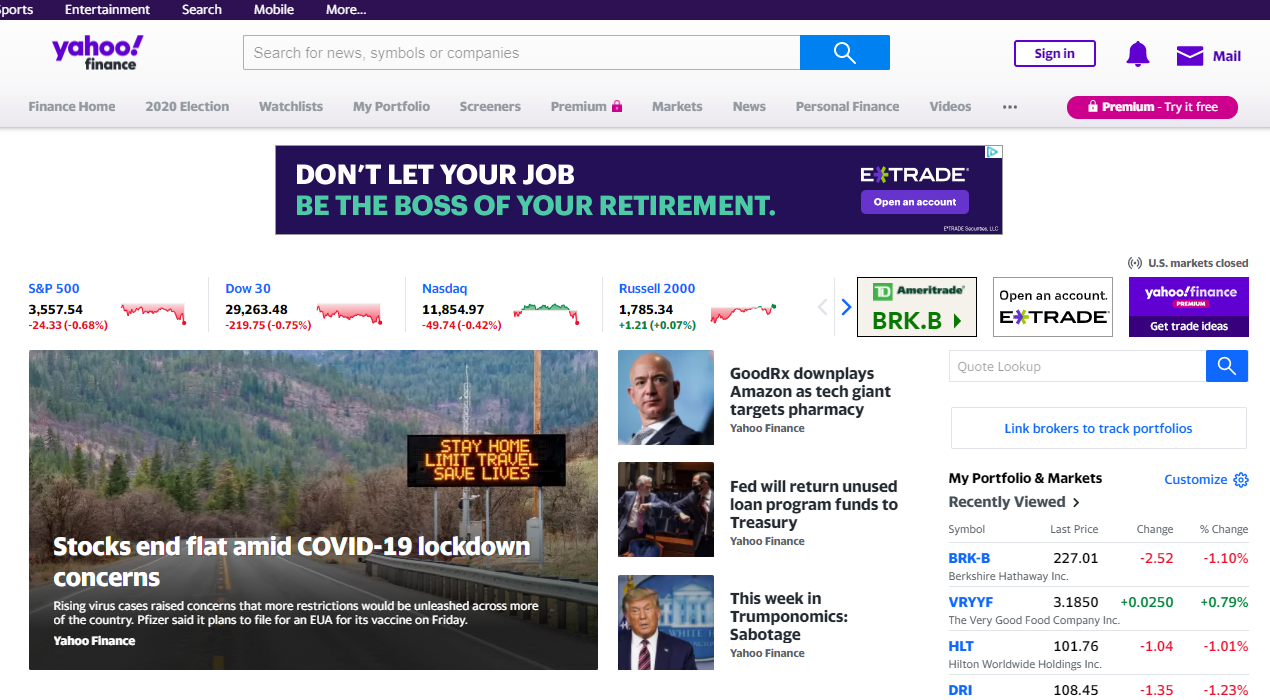

In [10]:
Image(filename= "D:\K\HU\HU - Courses\CISC 593 Software Verification and Validation\Assignments\Robo Investment Advisor\others\yahoofincance.png",
     width=800, height=400)

###### Initialize a Robo_Data insitance

In [13]:
yf_data = Robo_Data(API = "yahoo")

###### Call yahoo_historical_data method to get historical pricing data

In [15]:
sec_id = "AMZN" # Security Ticker
start_date = None # format: "yyyy-mm-dd"; if none, the method will return all data
end_date = None # format: "yyyy-mm-dd"; if none, the method will return all data

amzn_df = yf_data.yahoo_historical_data(sec_id = sec_id, start_date = start_date, end_date = end_date)

[*********************100%***********************]  1 of 1 completed


###### Check data

In [16]:
amzn_df

,date,open,close,high,low,volume
0,1997-05-15,2.437500,1.958333,2.500000,1.927083,72156000
1,1997-05-16,1.968750,1.729167,1.979167,1.708333,14700000
2,1997-05-19,1.760417,1.708333,1.770833,1.625000,6106800
3,1997-05-20,1.729167,1.635417,1.750000,1.635417,5467200
4,1997-05-21,1.635417,1.427083,1.645833,1.375000,18853200
...,...,...,...,...,...,...
5924,2020-11-27,3211.260010,3195.340088,3216.189941,3190.050049,2392900
5925,2020-11-30,3208.479980,3168.040039,3228.389893,3125.550049,4063900
5926,2020-12-01,3188.500000,3220.080078,3248.949951,3157.179932,4544400
5927,2020-12-02,3221.649902,3203.530029,3232.000000,3173.260010,3122500


###### Plot data

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]),
 <a list of 8 Text major ticklabel objects>)

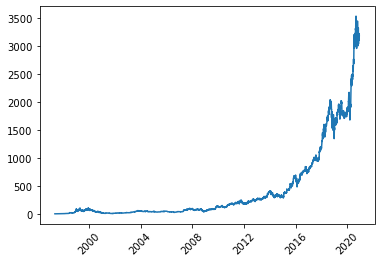

In [17]:
plt.plot(amzn_df['date'], amzn_df['close'])
plt.xticks(rotation=45)

## SimFin API

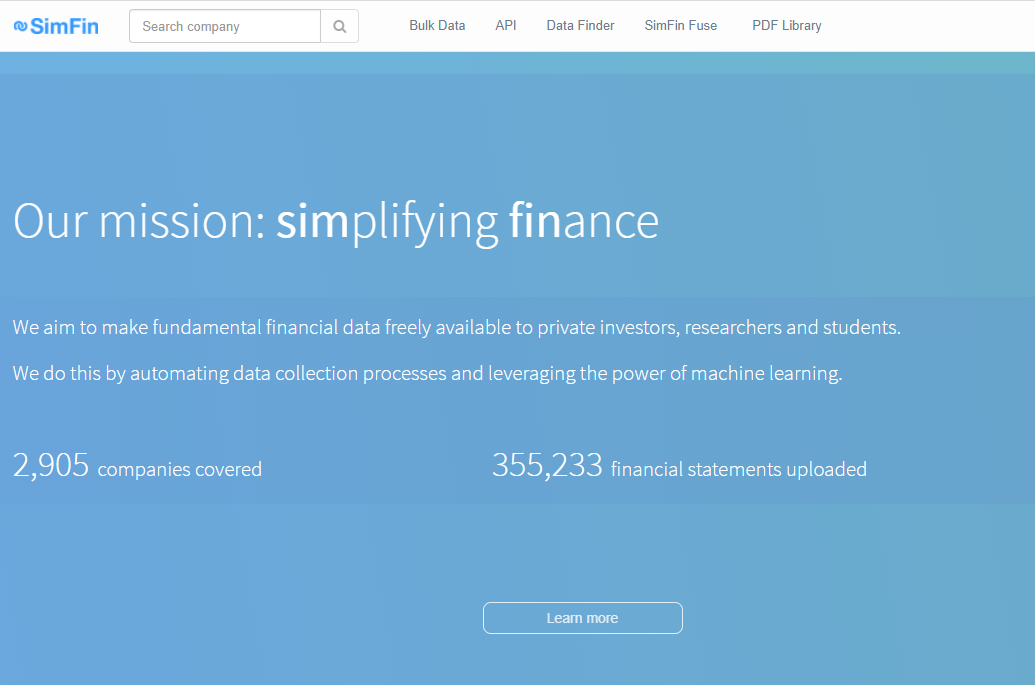

In [18]:
Image(filename= "D:\K\HU\HU - Courses\CISC 593 Software Verification and Validation\Assignments\Robo Investment Advisor\others\simfin.png",
     width=800, height=400)

###### Initialize a Robo_Data insitance

In [19]:
sf_data = Robo_Data(API = "simfin")

### historical pricing data

###### Call simfin_historical_data method to get historical pricing data

In [29]:
sec_id = "AAPL" # Security Ticker
start_date = None # format: "yyyy-mm-dd"; if none, the method will return all data
end_date = None # format: "yyyy-mm-dd"; if none, the method will return all data
period = 'Daily'
market = 'us'

aapl_df = sf_data.simfin_historical_data(sec_id = sec_id, period = period, market = market, 
                                         start_date = start_date, end_date = end_date)

Dataset "us-shareprices-daily" on disk (19 days old).
- Loading from disk ... Done!


In [30]:
aapl_df

,date,open,close,high,low,volume
0,2007-01-03,3.08,2.99,3.09,2.92,44225700
1,2007-01-04,3.00,3.06,3.07,2.99,30259300
2,2007-01-05,3.06,3.04,3.08,3.01,29812200
3,2007-01-08,3.07,3.05,3.09,3.05,28468100
4,2007-01-09,3.09,3.31,3.32,3.04,119617800
...,...,...,...,...,...,...
3488,2020-11-09,120.50,116.32,121.99,116.05,154515315
3489,2020-11-10,115.55,115.97,117.59,114.13,138023390
3490,2020-11-11,117.19,119.49,119.63,116.44,112294954
3491,2020-11-12,119.62,119.21,120.53,118.57,103350674


### Income Statement Data

In [31]:
sec_id = "AAPL" # Security Ticker
period = 'quarterly'
market = 'us'

aapl_df = sf_data.simfin_income_statement(sec_id = sec_id, period = period, market = market)

Dataset "us-income-quarterly" on disk (19 days old).
- Loading from disk ... Done!


In [32]:
aapl_df

,,SimFinId,Currency,Fiscal Year,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,Fiscal Period,,,,,,,,,,,,,,,,,,,,,
2000-06-30,Q3,111052,USD,2000,2001-05-14,2001-08-13,2.420866e+10,2.490018e+10,1.825000e+09,-1.282000e+09,5.430000e+08,...,52000000.0,NaN,220000000,50000000.0,270000000,-7.000000e+07,200000000,NaN,200000000,200000000
2000-09-30,Q4,111052,USD,2000,2001-12-21,2002-12-19,2.420866e+10,2.490018e+10,1.870000e+09,-1.403000e+09,4.670000e+08,...,62000000.0,NaN,146000000,83000000.0,229000000,-5.900000e+07,170000000,NaN,170000000,170000000
2000-12-31,Q1,111052,USD,2001,2001-02-11,2002-02-11,2.420866e+10,2.490018e+10,1.007000e+09,-1.028000e+09,-2.100000e+07,...,67000000.0,NaN,-353000000,58000000.0,-295000000,8.800000e+07,-207000000,NaN,-207000000,-195000000
2001-03-31,Q2,111052,USD,2001,2002-05-14,2002-05-14,2.420866e+10,2.490018e+10,1.431000e+09,-1.046000e+09,3.850000e+08,...,65000000.0,NaN,57000000,5000000.0,62000000,-1.900000e+07,43000000,NaN,43000000,43000000
2001-06-30,Q3,111052,USD,2001,2002-08-09,2002-08-09,2.420866e+10,2.490018e+10,1.475000e+09,-1.041000e+09,4.340000e+08,...,45000000.0,NaN,87000000,0.0,87000000,-2.600000e+07,61000000,NaN,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,Q4,111052,USD,2019,2019-10-29,2019-10-31,1.796325e+10,1.808150e+10,6.404000e+10,-3.972700e+10,2.431300e+10,...,502000000.0,NaN,16127000000,NaN,16127000000,-2.441000e+09,13686000000,NaN,13686000000,13686000000
2019-12-31,Q1,111052,USD,2020,2020-01-29,2020-01-29,1.766016e+10,1.781842e+10,9.181900e+10,-5.660200e+10,3.521700e+10,...,349000000.0,NaN,25918000000,NaN,25918000000,-3.682000e+09,22236000000,NaN,22236000000,22236000000
2020-03-31,Q2,111052,USD,2020,2020-05-01,2020-05-01,1.744040e+10,1.761876e+10,5.831300e+10,-3.594300e+10,2.237000e+10,...,282000000.0,NaN,13135000000,NaN,13135000000,-1.886000e+09,11249000000,NaN,11249000000,11249000000


### Balance Sheet

In [33]:
sec_id = "AAPL" # Security Ticker
period = 'quarterly'
market = 'us'

aapl_df = sf_data.simfin_balance_sheet(sec_id = sec_id, period = period, market = market)

aapl_df

Dataset "us-balance-quarterly" on disk (18 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2000-06-30,111052,USD,2000,Q3,2001-05-14,2001-08-13,2.420866e+10,2.490018e+10,4.027000e+09,9.530000e+08,...,NaN,1.933000e+09,3.000000e+08,7.630000e+08,2696000000,1.502000e+09,NaN,2.285000e+09,4.107000e+09,6803000000
2000-09-30,111052,USD,2000,Q4,2001-12-21,2001-12-21,2.420866e+10,2.490018e+10,4.027000e+09,9.530000e+08,...,NaN,1.933000e+09,3.000000e+08,7.630000e+08,2696000000,1.502000e+09,NaN,2.285000e+09,4.107000e+09,6803000000
2000-12-31,111052,USD,2001,Q1,2001-02-11,2002-02-11,2.420866e+10,2.490018e+10,4.336000e+09,4.660000e+08,...,NaN,1.518000e+09,3.170000e+08,5.830000e+08,2101000000,1.693000e+09,NaN,2.260000e+09,3.920000e+09,6021000000
2001-03-31,111052,USD,2001,Q2,2002-05-14,2002-05-14,2.420866e+10,2.490018e+10,4.336000e+09,4.660000e+08,...,NaN,1.518000e+09,3.170000e+08,5.830000e+08,2101000000,1.693000e+09,NaN,2.260000e+09,3.920000e+09,6021000000
2001-06-30,111052,USD,2001,Q3,2002-08-09,2002-08-09,2.420866e+10,2.490018e+10,4.336000e+09,4.660000e+08,...,NaN,1.518000e+09,3.170000e+08,5.830000e+08,2101000000,1.693000e+09,NaN,2.260000e+09,3.920000e+09,6021000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,111052,USD,2018,Q4,2018-10-30,2019-10-31,1.920635e+10,1.939019e+10,6.630100e+10,2.318600e+10,...,2.074800e+10,1.159290e+11,9.373500e+10,1.426490e+11,258578000000,4.020100e+10,NaN,7.040000e+10,1.071470e+11,365725000000
2018-12-31,111052,USD,2019,Q1,2019-01-29,2019-01-30,1.894328e+10,1.909301e+10,8.642700e+10,1.807700e+10,...,2.174100e+10,1.082830e+11,9.298900e+10,1.475440e+11,255827000000,4.097000e+10,NaN,8.051000e+10,1.178920e+11,373719000000
2019-03-31,111052,USD,2019,Q2,2019-05-01,2019-05-01,1.869628e+10,1.880258e+10,8.009200e+10,1.508500e+10,...,2.242900e+10,9.377200e+10,9.020100e+10,1.423660e+11,236138000000,4.280100e+10,NaN,6.455800e+10,1.058600e+11,341998000000


### Cashflow Statement

In [34]:
sec_id = "AAPL" # Security Ticker
period = 'quarterly'
market = 'us'

aapl_df = sf_data.simfin_cashflow_statment(sec_id = sec_id, period = period, market = market)

aapl_df

Dataset "us-cashflow-quarterly" on disk (18 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Net Income/Starting Line,Depreciation & Amortization,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
Report Date,,,,,,,,,,,,,,,,,,,,,
2000-06-30,111052,USD,2000,Q3,2001-05-14,2001-08-13,2.420866e+10,2.490018e+10,2.000000e+08,2.500000e+07,...,2.340000e+08,-1.000000e+07,6.800000e+08,NaN,-5.050000e+08,NaN,NaN,-4.700000e+07,-4.700000e+07,-318000000
2000-09-30,111052,USD,2000,Q4,2001-12-21,2002-12-19,2.420866e+10,2.490018e+10,1.700000e+08,1.800000e+07,...,2.000000e+08,-7.700000e+07,7.180000e+08,NaN,-3.630000e+08,NaN,NaN,1.000000e+07,1.000000e+07,-153000000
2000-12-31,111052,USD,2001,Q1,2001-02-11,2002-02-11,2.420866e+10,2.490018e+10,-1.950000e+08,2.400000e+07,...,-1.300000e+07,-2.200000e+07,1.146000e+09,NaN,5.560000e+08,NaN,NaN,3.000000e+06,3.000000e+06,546000000
2001-03-31,111052,USD,2001,Q2,2002-05-14,2002-05-14,2.420866e+10,2.490018e+10,4.300000e+07,2.200000e+07,...,-4.400000e+07,-1.700000e+07,1.552000e+09,NaN,4.300000e+08,NaN,NaN,1.500000e+07,1.500000e+07,401000000
2001-06-30,111052,USD,2001,Q3,2002-08-09,2002-08-09,2.420866e+10,2.490018e+10,6.100000e+07,2.600000e+07,...,-3.300000e+07,-3.000000e+07,1.204000e+09,NaN,1.000000e+07,NaN,NaN,6.000000e+06,6.000000e+06,-17000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,111052,USD,2018,Q4,2018-10-30,2019-10-31,1.920635e+10,1.939019e+10,1.412500e+10,2.754000e+09,...,1.952300e+10,-3.041000e+09,5.520000e+08,-290000000.0,-3.001000e+09,-3.530000e+09,-2.700000e+07,-1.876300e+10,-2.258000e+10,-6058000000
2018-12-31,111052,USD,2019,Q1,2019-01-29,2020-01-29,1.894328e+10,1.909301e+10,1.996500e+10,3.395000e+09,...,2.669000e+10,-3.355000e+09,9.422000e+09,-167000000.0,5.844000e+09,-3.568000e+09,6.000000e+06,-8.796000e+09,-1.367600e+10,18858000000
2019-03-31,111052,USD,2019,Q2,2019-05-01,2020-05-01,1.869628e+10,1.880258e+10,1.156100e+10,3.040000e+09,...,1.115500e+10,-2.363000e+09,1.574900e+10,-124000000.0,1.334800e+10,-3.443000e+09,-2.542000e+09,-2.331200e+10,-2.945700e+10,-4954000000


### Ratios

In [37]:
sec_id = "AAPL" # Security Ticker
variant = 'annual'
market = 'us'

aapl_df = sf_data.simfin_Derived_Ratios(sec_id = sec_id, variant = variant, market = market)

aapl_df.head()

Dataset "us-derived-annual" on disk (12 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,EBITDA,Total Debt,Free Cash Flow,Gross Profit Margin,...,Current Ratio,Liabilities to Equity Ratio,Debt Ratio,"Earnings Per Share, Basic","Earnings Per Share, Diluted",Sales Per Share,Equity Per Share,Free Cash Flow Per Share,Dividends Per Share,Pietroski F-Score
Report Date,,,,,,,,,,,,,,,,,,,,,
2000-09-30,111052,USD,2000,FY,2001-12-21,2002-12-19,704000000.0,300000000,1.060000e+09,0.27133,...,2.80755,0.65644,0.04410,0.03247,0.03157,0.32976,0.16651,0.04379,NaN,NaN
2001-09-30,111052,USD,2001,FY,2002-12-19,2003-12-19,-233000000.0,317000000,-2.690000e+08,0.23028,...,3.38801,0.53597,0.05265,-0.00103,-0.00100,0.22153,0.16193,-0.01111,NaN,NaN
2002-09-30,111052,USD,2002,FY,2003-12-19,2004-12-03,162000000.0,316000000,-1.020000e+08,0.27917,...,3.24970,0.53797,0.05017,0.00268,0.00261,0.23719,0.16915,-0.00421,NaN,7.0
2003-09-30,111052,USD,2003,FY,2004-08-05,2005-12-01,138000000.0,304000000,1.170000e+08,0.27517,...,2.49767,0.61378,0.04461,0.00285,0.00277,0.25640,0.17444,0.00483,NaN,5.0
2004-09-30,111052,USD,2004,FY,2005-12-01,2006-12-29,486000000.0,0,7.820000e+08,0.27262,...,2.66126,0.58589,0.00000,0.01099,0.01068,0.34199,0.20968,0.03230,NaN,6.0


# Back-Testing

###### Users can back-testing strategies utilizing technical indicators:
    - SMA (simple moving average)
    - RSI (relative strength index)
    - BB (bollinger bands)
These technical indicators will provide buy or sell signals and back-testing is to see how would our investment do if we 
follow these signals.

## SMA

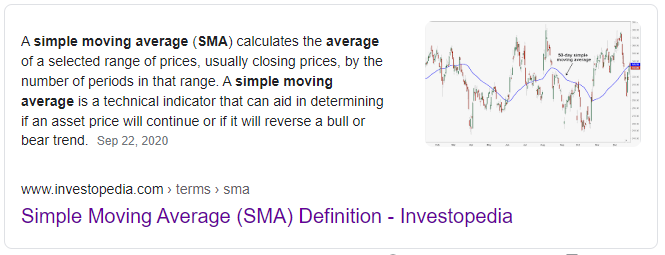

In [43]:
Image(filename= "D:\K\HU\HU - Courses\CISC 593 Software Verification and Validation\Assignments\Robo Investment Advisor\others\sma.png",
     width=800, height=400)

###### Initialize a Robo_Data insitance

In [38]:
yf_data = Robo_Data(API = "yahoo")

###### Call yahoo_historical_data method to get historical pricing data

In [40]:
sec_id = "AAPL" # Security Ticker
start_date = "2018-01-01" # format: "yyyy-mm-dd"; if none, the method will return all data
end_date = "2020-10-31" # format: "yyyy-mm-dd"; if none, the method will return all data

aapl_df = yf_data.yahoo_historical_data(sec_id = sec_id, start_date = start_date, end_date = end_date)

[*********************100%***********************]  1 of 1 completed


###### Intialize a backtesting instance with data

In [41]:
backtesting = Robo_Strategy_BackTesting(aapl_df)

###### Call function SMA_single_parameter to perform backtesting using SMA strategy

In [42]:
#parameters

sma_short = 7
sma_long = 30

bt_result = backtesting.SMA_single_parameter(sma_short =sma_short, sma_long = sma_long)

Back-testing result:
	sma_short:7, sma_long:30
Strategy gain in this back-test is 2.45
Stock gain in this back-test is 2.53


###### We can see the back-testing result printed.

## RSI

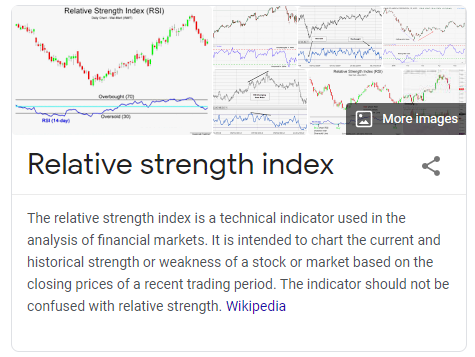

In [44]:
Image(filename= "D:\K\HU\HU - Courses\CISC 593 Software Verification and Validation\Assignments\Robo Investment Advisor\others\RSI.png",
     width=800, height=400)

###### Initialize a Robo_Data insitance

In [38]:
yf_data = Robo_Data(API = "yahoo")

###### Call yahoo_historical_data method to get historical pricing data

In [40]:
sec_id = "AAPL" # Security Ticker
start_date = "2018-01-01" # format: "yyyy-mm-dd"; if none, the method will return all data
end_date = "2020-10-31" # format: "yyyy-mm-dd"; if none, the method will return all data

aapl_df = yf_data.yahoo_historical_data(sec_id = sec_id, start_date = start_date, end_date = end_date)

[*********************100%***********************]  1 of 1 completed


###### Intialize a backtesting instance with data

In [41]:
backtesting = Robo_Strategy_BackTesting(aapl_df)

###### Call function SMA_single_parameter to perform backtesting using SMA strategy

In [51]:
#parameters

period = 14

bt_result = backtesting.RSI_single_parameter(period = period)

Back-testing result:
period:14
Strategy gain in this back-test is 1.35
Stock gain in this back-test is 2.53


## BB

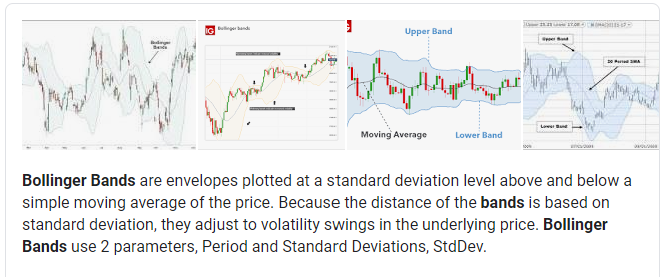

In [50]:
Image(filename= r"D:\K\HU\HU - Courses\CISC 593 Software Verification and Validation\Assignments\Robo Investment Advisor\others\bb.png",
     width=800, height=400)

###### Initialize a Robo_Data insitance

In [38]:
yf_data = Robo_Data(API = "yahoo")

###### Call yahoo_historical_data method to get historical pricing data

In [40]:
sec_id = "AAPL" # Security Ticker
start_date = "2018-01-01" # format: "yyyy-mm-dd"; if none, the method will return all data
end_date = "2020-10-31" # format: "yyyy-mm-dd"; if none, the method will return all data

aapl_df = yf_data.yahoo_historical_data(sec_id = sec_id, start_date = start_date, end_date = end_date)

[*********************100%***********************]  1 of 1 completed


###### Intialize a backtesting instance with data

In [41]:
backtesting = Robo_Strategy_BackTesting(aapl_df)

###### Call function SMA_single_parameter to perform backtesting using SMA strategy

In [53]:
#parameters

sma_period = 30 
std_period = 20

bt_result = backtesting.Bollinger_single_parameter(sma_period = sma_period, std_period = std_period)

Back-testing result:
	sma_period:30, std_period:20
Strategy gain in this back-test is 1.02
Stock gain in this back-test is 2.53


## Robo Monitor and Alert

###### This module shall be used to monitor securities for strategies and get alert on actions.

###### initialize an instance of Robo_Monitor

In [54]:
# gmail account
email_add = ""
email_pwd = ""

rb_monitor = Robo_Monitor(email_add = email_add, email_pwd = email_pwd)

### Monitor Strategy: SMA

In [ ]:
# parameters

sec_id = 'AAPL' # security to monitor
sma_short = 20 # parameter for the strategy
sma_long = 50 # parameter for the strategy
start_date = "2018-10-30" # start date on the strategy

rb_monitor.Monitor_SMA(sec_id = sec_id, sma_short = sma_short,
                      sma_long = sma_long, start_date = start_date)

###### Users can run this function every day after the market close to get alert on the new action to take.

### Monitor Strategy: RSI

In [ ]:
# parameters

sec_id = 'AAPL' # security to monitor
period = 14 # parameter for the strategy

start_date = "2018-10-30" # start date on the strategy

rb_monitor.Monitor_RSI(sec_id = sec_id, period = period, start_date = start_date)

###### Users can run this function every day after the market close to get alert on the new action to take.

### Monitor Strategy: BB

###### Users can run this function every day after the market close to get alert on the new action to take.

In [ ]:
# parameters

sec_id = 'AAPL' # security to monitor
sma_period =30 # parameter for the strategy
std_period = 20 # parameter for the strategy
start_date = "2018-10-30" # start date on the strategy

rb_monitor.Monitor_BOLLBands(sec_id = sec_id, sma_period = sma_period,
                      std_period = std_period, start_date = start_date)

###### Once users get familiar with the application, they can try different strategies.